<img src="img/01.png">

# 01. Matplotlib - basics

## 01.01 What is Matplotlib?

#### According to Matplotlib website: https://matplotlib.org

Matplotlib is a **Python 2D plotting library** which produces publication quality figures in a variety of hardcopy formats and interactive environments across platforms. Matplotlib can be used in Python scripts, the Python and IPython shells, the Jupyter notebook, web application servers, and four graphical user interface toolkits.

#### According to [REF1](../README.md) :

Matplotlib is a multiplatform **data visualization library built on NumPy arrays**, and designed to work with the broader SciPy stack.

## 01.02 Quickstart - Let's make your first plot!


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Options below determinest the way matplotlib
# outputs the plots
# use `%matplotlib --list` to see more options 

# recommended way - it embeds plots like JPGs in the document
%matplotlib inline 

# interactive way to scroll/move the plot
# to be honest - if you want to play with graphs this way - use different library than matplotlib
# %matplotlib notebook

In [2]:
# prepare the data
x = np.linspace(0, 3*np.pi, 20)
y_sin = np.sin(x)
y_cos = np.cos(x)
display(x, y_sin, y_cos)

array([0.        , 0.49604095, 0.99208189, 1.48812284, 1.98416378,
       2.48020473, 2.97624567, 3.47228662, 3.96832756, 4.46436851,
       4.96040945, 5.4564504 , 5.95249134, 6.44853229, 6.94457323,
       7.44061418, 7.93665512, 8.43269607, 8.92873702, 9.42477796])

array([ 0.00000000e+00,  4.75947393e-01,  8.37166478e-01,  9.96584493e-01,
        9.15773327e-01,  6.14212713e-01,  1.64594590e-01, -3.24699469e-01,
       -7.35723911e-01, -9.69400266e-01, -9.69400266e-01, -7.35723911e-01,
       -3.24699469e-01,  1.64594590e-01,  6.14212713e-01,  9.15773327e-01,
        9.96584493e-01,  8.37166478e-01,  4.75947393e-01,  3.67394040e-16])

array([ 1.        ,  0.87947375,  0.54694816,  0.08257935, -0.40169542,
       -0.78914051, -0.9863613 , -0.94581724, -0.67728157, -0.24548549,
        0.24548549,  0.67728157,  0.94581724,  0.9863613 ,  0.78914051,
        0.40169542, -0.08257935, -0.54694816, -0.87947375, -1.        ])

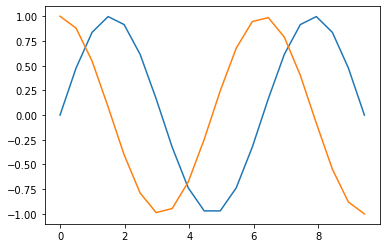

In [3]:
# plotting
plt.plot(x, y_sin)
plt.plot(x, y_cos)

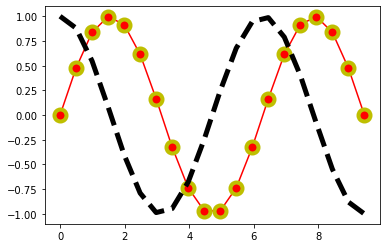

In [4]:
# let's add something more
plt.plot(x, y_sin, 'o-', color = 'red', markersize=12, markeredgecolor='y', markeredgewidth=4)
plt.plot(x, y_cos, '--', c='k', linewidth = 5)

* IMPORTANT - SHOW plt.plot?
* IMPORTANT - SHOW [REF2](../README.md)

## 01.03 Matplotlib - 3 interfaces for the same price!
One of the most important concepts to understand ~~posts on stackoverflow~~ mathplotlib.

#### According to [REF1](../README.md) :

A potentially confusing feature of Matplotlib is its dual interfaces: a convenient
MATLAB-style state-based interface, and a more powerful object-oriented interface.

... moreover +1 for pandas interface.

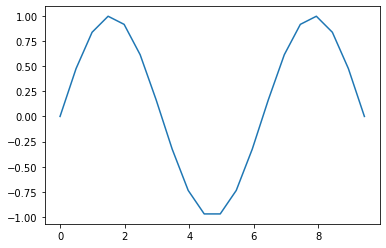

In [5]:
# FIRST way: plotting using library
plt.plot(x, y_sin)

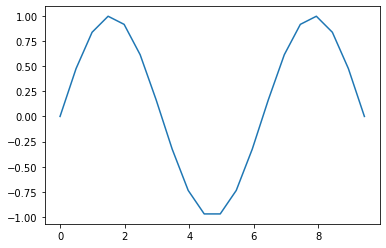

In [6]:
# SECOND way: plotting using objects
fig, ax = plt.subplots(1,1)
ax.plot(x, y_sin)

In [7]:
df = pd.DataFrame(y_sin, index=x, columns=['y_sin'])
df.head()

,y_sin
0.000000,0.000000
0.496041,0.475947
0.992082,0.837166
1.488123,0.996584
1.984164,0.915773


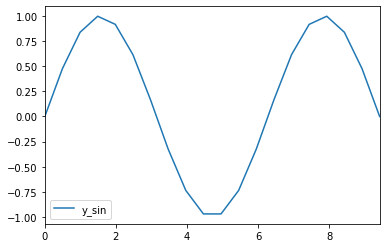

In [8]:
# THIRD way: plotting using pandas
df.plot()

## 01.04 Matplotlib - some other types of plots
* scatterplot  

**IMPORTANT** - efficiency  
`plt.plot`    - the same  size/color/etc... >>> more efficient  
`plt.scatter` - different size/color/etc... >>> less efficient  

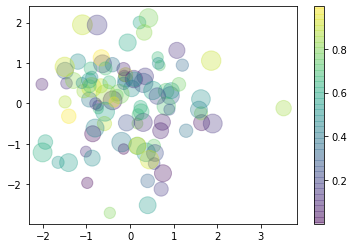

In [9]:
amount = 100
x1 = np.random.randn(amount)
x2 = np.random.randn(amount)
sizes = np.random.randint(100, 400, size = (amount))
colors = np.random.rand(amount)

plt.scatter(x1, x2, sizes, colors, alpha=0.3)
plt.colorbar()

Unfortuanately using scatterplot does not give intuition about data density around particular areas. To address this question we need histograms.

* histograms

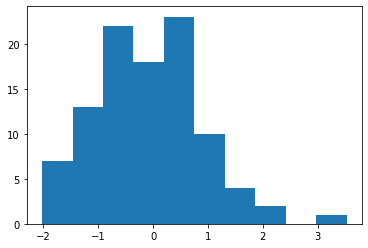

In [10]:
plt.hist(x1, bins=10);

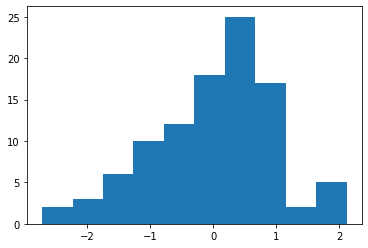

In [11]:
plt.hist(x2, bins=10);

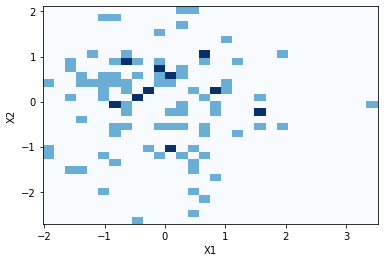

In [12]:
# to show bot variables
plt.hist2d(x1, x2, bins=30, cmap='Blues')
plt.xlabel("X1")
plt.ylabel("X2");

### Which one should I choose?
There are many plots that are possible to make. Moreover there are **tons of tutorials** in the internet how to do them. We will not focus on them in this course.

<img src="img/02.jpg">

* 2-variable functions plots

A different task is to plot a function of two variables

In [13]:
# prepare data
x = np.linspace(0, np.pi*5, 50)
y = np.linspace(-np.pi, np.pi, 30)

# meshgrid is pretty common concept for plotting function of 2 variables
# I recommend to get familiar with its return values
X, Y = np.meshgrid(x, y)
# Z = np.sin(x)*np.cos(x) <<<< NOTE! this won't work!
Z = np.sin(X)*np.cos(Y)

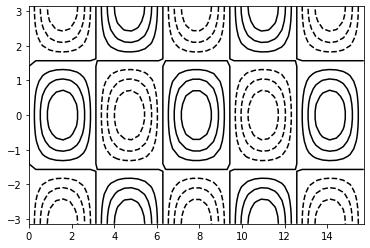

In [14]:
plt.contour(X, Y, Z, colors='black');

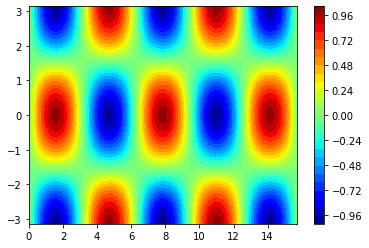

In [15]:
plt.contourf(X, Y, Z, levels=30, cmap='jet')
plt.colorbar();

## 01.04 Figure, subplot, axes, axis


<class 'matplotlib.figure.Figure'>
<class 'numpy.ndarray'>
<class 'matplotlib.axes._subplots.AxesSubplot'>


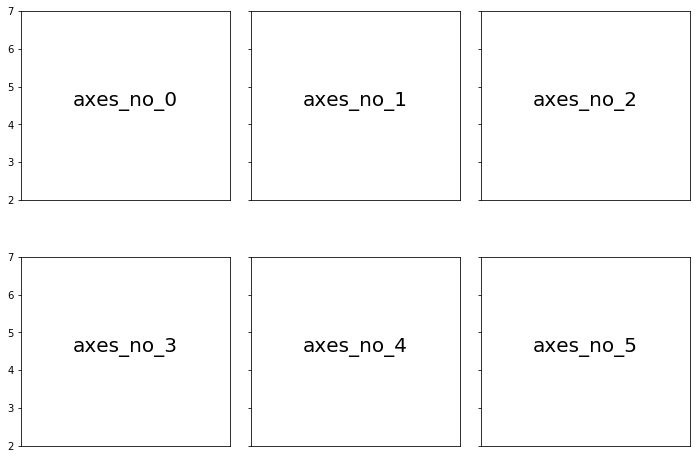

In [32]:
fig, ax = plt.subplots(2, 3, sharex='col', sharey='row', figsize=(12,8), 
                       subplot_kw={'xticks':[]}, 
                       gridspec_kw=dict(hspace=0.3, wspace=0.1))
print(type(fig))
print(type(ax))
print(type(ax.flat[0]))
for axi_idxm, axi in enumerate(ax.flat):
    axi.text(0.5, 4.5, f"axes_no_{axi_idxm}", fontsize=20, horizontalalignment='center')
    axi.set_ylim(2,7)